In [14]:
import gpxpy
import gpxpy.gpx

import pandas as pd
import matplotlib.pyplot as plt
import datetime
import folium

plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
from IPython.display import display

In [6]:
df_full = pd.read_csv('data/route_2loop_df.csv')
print(len(df_full))
df_full.head()

4304


,time,latitude,longitude,elevation,pointxyz,step_dist,mph,elevation_change,5sec_rolling_elv,second
0,2021-11-19 14:52:53+00:00,38.796494,-77.045523,-3.0,"(38.79649353213608, -77.04552322626114, -3.0)",0.000000,0.000000,0.0,NaN,0
1,2021-11-19 14:52:54+00:00,38.796489,-77.045519,-3.0,"(38.79648883827031, -77.04551886767149, -3.0)",0.000400,1.440858,0.0,NaN,1
2,2021-11-19 14:52:55+00:00,38.796473,-77.045510,-3.0,"(38.796473080292344, -77.04550998285413, -3.0)",0.001188,4.277103,0.0,NaN,2
3,2021-11-19 14:52:56+00:00,38.796457,-77.045503,-3.0,"(38.79645690321922, -77.04550285823643, -3.0)",0.001180,4.249086,0.0,NaN,3
4,2021-11-19 14:52:57+00:00,38.796427,-77.045499,-2.8,"(38.796427231281996, -77.04549883492291, -2.79...",0.002062,7.422258,0.2,0.04,4


In [34]:
df = df_full[df_full['latitude']< 38.7755 ]
# df = df[df['latitude']< 38.773 ]
len(df)


2700

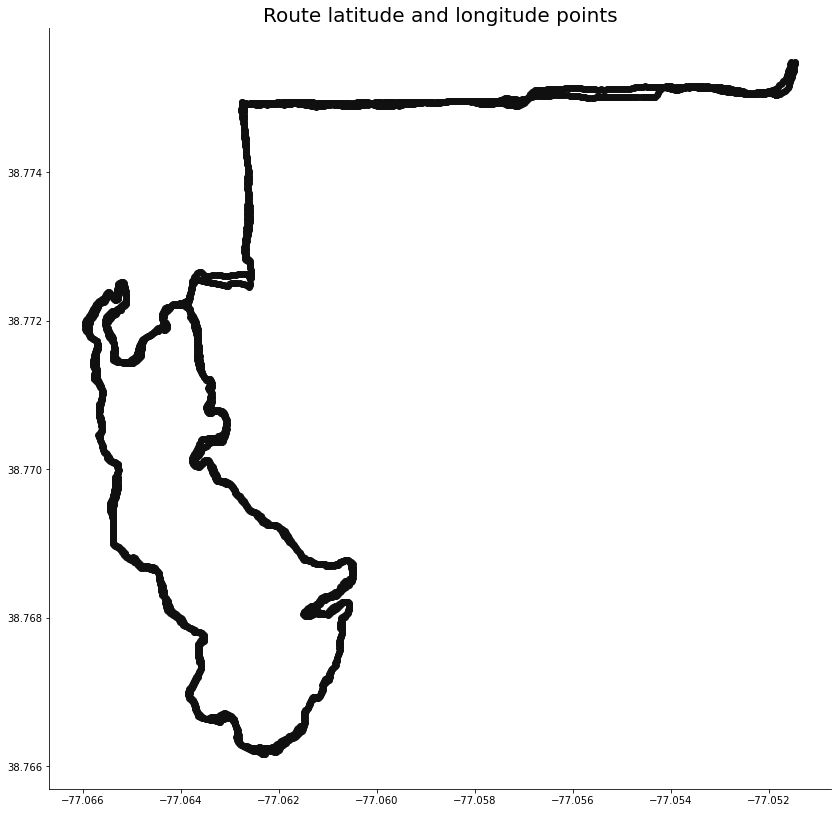

In [36]:
plt.figure(figsize=(14, 14))
plt.scatter(df['longitude'], df['latitude'], color='#101010')
plt.title('Route latitude and longitude points', size=20);

In [37]:
df.head(20)

,time,latitude,longitude,elevation,pointxyz,step_dist,mph,elevation_change,5sec_rolling_elv,second
809,2021-11-19 15:06:22+00:00,38.775479,-77.051548,-18.600000,"(38.775479178875685, -77.05154805444181, -18.6...",0.002289,8.241120,-0.200001,-0.28,809
810,2021-11-19 15:06:23+00:00,38.775452,-77.051560,-18.400000,"(38.77545210532844, -77.05156012438238, -18.39...",0.001982,7.133779,0.200001,-0.24,810
811,2021-11-19 15:06:24+00:00,38.775422,-77.051572,-18.400000,"(38.77542234957218, -77.05157169140875, -18.39...",0.002145,7.723634,0.000000,-0.12,811
812,2021-11-19 15:06:25+00:00,38.775387,-77.051580,-18.400000,"(38.775386894121766, -77.05158015713096, -18.3...",0.002488,8.956947,0.000000,-0.04,812
813,2021-11-19 15:06:26+00:00,38.775362,-77.051595,-18.000000,"(38.77536158077419, -77.0515950769186, -18.0)",0.001938,6.976453,0.400000,0.08,813
814,2021-11-19 15:06:27+00:00,38.775332,-77.051607,-18.000000,"(38.775332160294056, -77.05160731449723, -18.0)",0.002134,7.683374,0.000000,0.12,814
815,2021-11-19 15:06:28+00:00,38.775303,-77.051627,-17.600000,"(38.77530265599489, -77.05162684433162, -17.60...",0.002305,8.296922,0.400000,0.16,815
816,2021-11-19 15:06:29+00:00,38.775269,-77.051648,-17.400000,"(38.775269044563174, -77.05164830200374, -17.3...",0.002595,9.340774,0.200001,0.20,816
817,2021-11-19 15:06:30+00:00,38.775245,-77.051671,-17.400000,"(38.77524456940591, -77.05167135223746, -17.39...",0.002097,7.550920,0.000000,0.20,817
818,2021-11-19 15:06:31+00:00,38.775227,-77.051696,-17.400000,"(38.77522721886635, -77.05169633030891, -17.39...",0.001803,6.491486,0.000000,0.12,818


In [68]:
lat_diff =[0]
long_diff= [0]
for i in range(len(df_full)-1):
    ltdiff =df_full['latitude'][i+1] - df_full['latitude'][i]
    # print(ltdiff)
    lgdiff =df_full['longitude'][i+1] - df_full['longitude'][i]

    lat_diff.append(ltdiff)
    long_diff.append(lgdiff)

df_full['lat_diff'] =pd.Series('lat_diff')
df_full['long_diff'] =pd.Series('long_diff')
df_full.head(10)


,time,latitude,longitude,elevation,pointxyz,step_dist,mph,elevation_change,5sec_rolling_elv,second,lat_diff,long_diff
0,2021-11-19 14:52:53+00:00,38.796494,-77.045523,-3.0,"(38.79649353213608, -77.04552322626114, -3.0)",0.000000,0.000000,0.0,NaN,0,lat_diff,long_diff
1,2021-11-19 14:52:54+00:00,38.796489,-77.045519,-3.0,"(38.79648883827031, -77.04551886767149, -3.0)",0.000400,1.440858,0.0,NaN,1,NaN,NaN
2,2021-11-19 14:52:55+00:00,38.796473,-77.045510,-3.0,"(38.796473080292344, -77.04550998285413, -3.0)",0.001188,4.277103,0.0,NaN,2,NaN,NaN
3,2021-11-19 14:52:56+00:00,38.796457,-77.045503,-3.0,"(38.79645690321922, -77.04550285823643, -3.0)",0.001180,4.249086,0.0,NaN,3,NaN,NaN
4,2021-11-19 14:52:57+00:00,38.796427,-77.045499,-2.8,"(38.796427231281996, -77.04549883492291, -2.79...",0.002062,7.422258,0.2,0.04,4,NaN,NaN
5,2021-11-19 14:52:58+00:00,38.796394,-77.045500,-2.4,"(38.79639437422156, -77.04550009220839, -2.400...",0.002280,8.208513,0.4,0.12,5,NaN,NaN
6,2021-11-19 14:52:59+00:00,38.796364,-77.045505,-2.0,"(38.796363696455956, -77.04550453461707, -2.0)",0.002143,7.715373,0.4,0.20,6,NaN,NaN
7,2021-11-19 14:53:00+00:00,38.796336,-77.045511,-2.0,"(38.79633595235646, -77.04551107250154, -2.0)",0.001946,7.005748,0.0,0.20,7,NaN,NaN
8,2021-11-19 14:53:01+00:00,38.796307,-77.045516,-2.0,"(38.79630737006664, -77.04551576636732, -2.0)",0.001988,7.156096,0.0,0.20,8,NaN,NaN
9,2021-11-19 14:53:02+00:00,38.796281,-77.045523,-2.0,"(38.79628079943359, -77.04552314244211, -2.0)",0.001876,6.752080,0.0,0.16,9,NaN,NaN


In [65]:
# lat_diff[0:10]

df_full['latitude'][1]-df_full['latitude'][0]
ltdiff

2.2798776626586914e-05

In [31]:
route_map = folium.Map(
    location=[38.778, -77.05],
    zoom_start=14,
    tiles='OpenStreetMap',
    width= 600,
    height=600
)

# for _, row in df_full.iterrows():
#     folium.CircleMarker(
#         location=[row['latitude'], row['longitude']],
#         radius=3,
#     ).add_to(route_map)
coordinates = [tuple(x) for x in df_full[['latitude','longitude']].to_numpy()]
folium.PolyLine(coordinates, weight=6).add_to(route_map)

display(route_map)